In [1]:
# Assuming that the fridom package is in the parent directory
# If fridom is installed, the next two lines are not needed
import sys, os
sys.path.append(os.path.abspath('..'))

import fridom.ShallowWater as sw

# First Steps: Quickstart

100%|██████████| 2500/2500 [00:10<00:00, 243.99it/s]


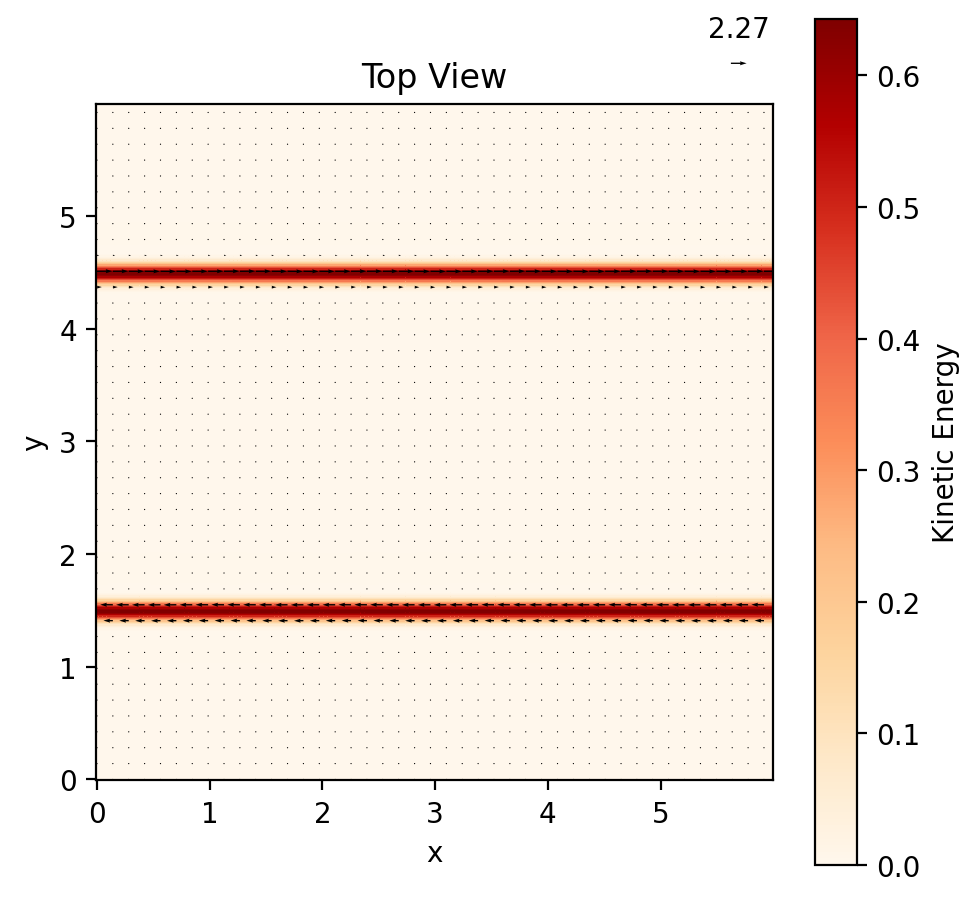

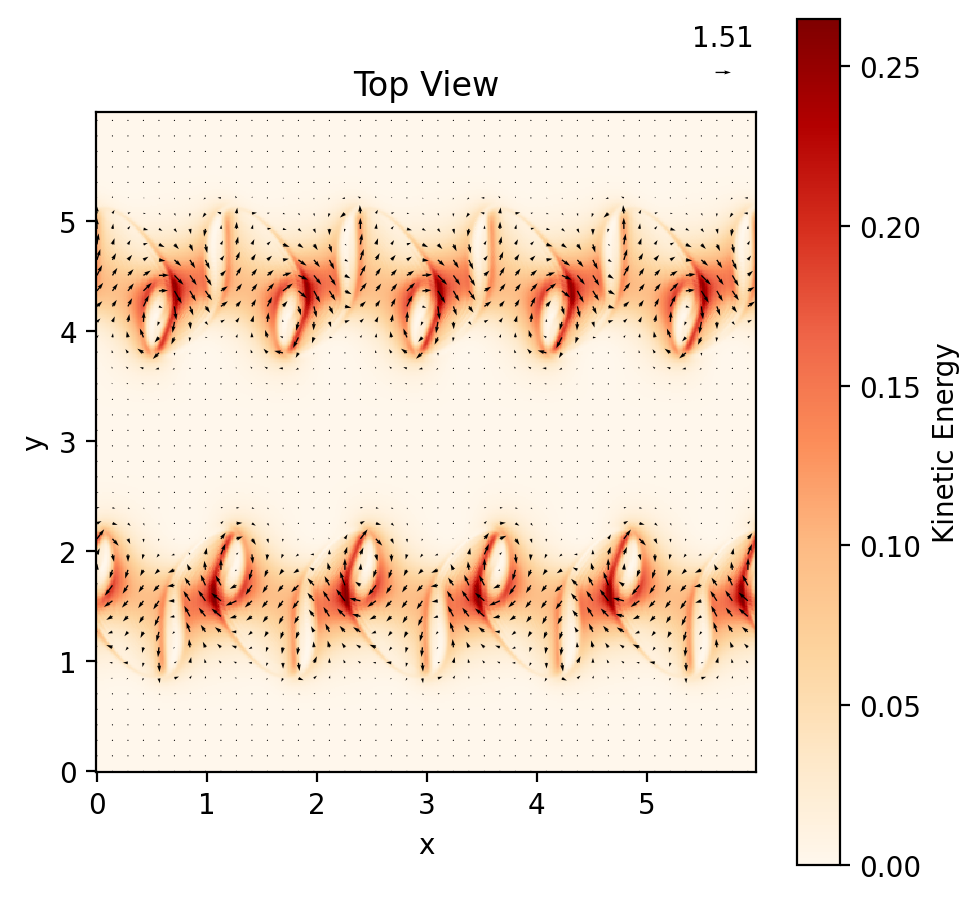

In [2]:
mset = sw.ModelSettings(
    Ro=0.5, N=[511,511], L=[6,6])          # create model settings
grid = sw.Grid(mset)                       # create grid
model = sw.Model(mset, grid)               # create model

# set initial conditions
model.z = sw.InitialConditions.Jet(mset, grid)

# plot top view of initial kinetic energy
sw.Plot(model.z.ekin())(model.z)

# run model
model.run(runlen=5)

# plot top view of final kinetic energy
sw.Plot(model.z.ekin())(model.z)

## Model Settings
The model settings class is used to set the model paramters, for example physical parameters, such as the coriolis parameter, or numerical parameters, such as the resolution and the time step. A list of all model settings can be found in the documentation of the ModelSettings class ("py_src/ModelSettings.py"). Settings can be given as keyword arguments to the constructor or can modified later on:

In [3]:
# Modify Settings during the construction
# Settings with Rossby number 0.1 and Burger Number 2
mset = sw.ModelSettings(Ro=0.1, csqr=2)

# Modify Settings after the construction
mset.N = [201, 201]    # change resolution

# print settings
mset                       # alternatively: print(mset)

  Model Settings:
  Model name: ShallowWater
  Spatial parameters:
    n_dims = 2
    L = [6.283, 6.283]
    N = [201, 201]
    dg = [0.031, 0.031]
  Boundary conditions:
    Periodic : [True, True]
  Time parameters:
    dt  = 0.002    eps = 0.010
    time_levels = 3
------------------------------------------------
  Physical parameters:
    csqr = 2.000
    f0   = 1.000
    beta = 0.000
    Ro   = 0.100
  Friction and mixing parameters:
    ahbi = 0.00e+00    khbi = 0.00e+00    ah   = 0.00e+00    kh   = 0.00e+00  Switches:
    enable_nonlinear  = True
    enable_varying_f  = False
    enable_source     = False
    enable_biharmonic = False
    enable_harmonic   = False

## Model
The model consist of 3 prognostic variables (u,v,h) that are stored in the state variable z. The state variable can be accessed with `model.z`.

In [4]:
mset = sw.ModelSettings()           # create model settings
mset.N = [101, 101]
mset.L = [4, 4]
mset.diag_interval = 200            # set diagnostic interval to 200
mset.enable_diag = True             # enable diagnostics output
mset.enable_tqdm = False            # disable progress bar

grid = sw.Grid(mset)                # create grid

z_ini = sw.InitialConditions.Jet(mset, grid)

model = sw.Model(mset, grid)        # create model
model.z = z_ini.copy()              # set initial conditions

# model runtime can either be specified in time steps or in seconds
model.run(steps=1000)               # run model

# get final state of model
z_final = model.z

# print summary of timing information
model.timer                       # alternatively: print(model.timer)

Diagnostic at t = 0.00
MKE = 2.01e-03,    MPE = 5.00e-01,    MTE = 5.02e-01
CFL = 0.12
Diagnostic at t = 0.40
MKE = 2.01e-03,    MPE = 5.00e-01,    MTE = 5.02e-01
CFL = 0.12
Diagnostic at t = 0.80
MKE = 2.01e-03,    MPE = 5.00e-01,    MTE = 5.02e-01
CFL = 0.12
Diagnostic at t = 1.20
MKE = 2.01e-03,    MPE = 5.00e-01,    MTE = 5.02e-01
CFL = 0.12
Diagnostic at t = 1.60
MKE = 2.01e-03,    MPE = 5.00e-01,    MTE = 5.02e-01
CFL = 0.12


 Timing Summary: 
Total Integration             : 00:00:04s   (100.0%)
Diagnostics                   : 00:00:00s   (0.5%)
Write Snapshot                : 00:00:00s   (0.0%)
Live Plotting                 : 00:00:00s   (0.0%)
Video Writer                  : 00:00:00s   (0.0%)
Total Tendency                : 00:00:02s   (70.5%)
Time Stepping                 : 00:00:01s   (27.3%)
Linear Tendency               : 00:00:01s   (25.7%)
Nonlinear Tendency            : 00:00:01s   (44.5%)
Harmonic Tendency             : 00:00:00s   (0.0%)
Biharmonic Tendency           : 00:00:00s   (0.0%)
Source Tendency               : 00:00:00s   (0.0%)